In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import cv2
from tqdm import tqdm

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [ ]:
train_path = './mnist/train/'
test_path = './mnist/test/'
trainset = datasets.MNIST(train_path, download=True, train=True, transform=transform)
valset = datasets.MNIST(test_path, download=True, train=False, transform=transform)

In [ ]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/train/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
for option in dir(trainset):
    if option[0] != '_':
        print(option)

class_to_idx
classes
data
download
extra_repr
mirrors
processed_folder
raw_folder
resources
root
target_transform
targets
test_data
test_file
test_labels
train
train_data
train_labels
training_file
transform
transforms


In [ ]:
print(trainset.data.shape)
print(trainset.targets.shape)
print(valset.data.shape)
print(valset.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [ ]:
print(trainloader)

In [ ]:
for option in dir(trainloader):
    if option[0] != '_':
        print(option)

batch_sampler
batch_size
check_worker_number_rationality
collate_fn
dataset
drop_last
generator
multiprocessing_context
num_workers
persistent_workers
pin_memory
pin_memory_device
prefetch_factor
sampler
timeout
worker_init_fn


In [ ]:
dataiter = iter(trainloader)
images ,labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


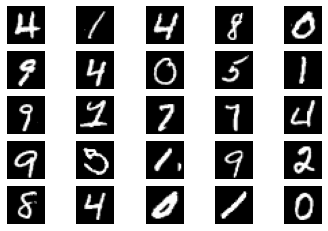

In [ ]:
num_of_images = 25
for index in range(1, num_of_images+1):
    plt.subplot(5,5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap='gray')



Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
!unzip dataset.zip -d dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100% 65.7M/65.7M [00:01<00:00, 34.7MB/s]
Archive:  dataset.zip
   creating: dataset/no/
  inflating: dataset/no/no0.jpg      
  inflating: dataset/no/no1.jpg      
  inflating: dataset/no/no10.jpg     
  inflating: dataset/no/no100.jpg    
  inflating: dataset/no/no1000.jpg   
  inflating: dataset/no/no1001.jpg   
  inflating: dataset/no/no1002.jpg   
  inflating: dataset/no/no1003.jpg   
  inflating: dataset/no/no1004.jpg   
  inflating: dataset/no/no1005.jpg   
  inflating: dataset/no/no1006.jpg   
  inflating: dataset/no/no1007.jpg   
  inflating: dataset/no/no1008.jpg   
  inflating: dataset/no/no1009.jpg   
  inflating: dataset/n

In [ ]:
transform1 = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [ ]:
dataset = datasets.ImageFolder('dataset', transform=transform1)
split_rate = [int(0.8*len(dataset)),int(0.2*len(dataset))]
trainset1, valset1 = torch.utils.data.random_split(dataset, split_rate)

In [ ]:
trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=32, shuffle=True)
valloader1 = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=True)

In [ ]:
dataiter1 = iter(trainloader1)
images, labels = next(dataiter1)

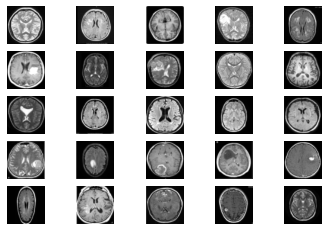

In [ ]:
num_of_images = 25
for index in range(1, num_of_images+1):
    plt.subplot(5,5, index)
    plt.axis('off')
    x = images[index].numpy()
    x = np.moveaxis(x,0,-1)
    x = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    plt.imshow(x,cmap='gray')

In [ ]:
input_size = 28 * 28
hidden_size = [128, 64]
output_size = 10

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0],hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1],output_size)
)

In [ ]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = list()
        self.layers.append(nn.Linear(input_size,hidden_dims[0]))
        self.layers.append(nn.ReLU())
        for idx in range(len(hidden_dims)-1):
            self.layers.append(nn.Linear(hidden_dims[idx],hidden_size[idx+1]))
            self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(hidden_dims[-1],output_dim))

    def forward(self, X):
        x = self.flatten(X) 
        for layer in self.layers:
            x = layer(x)
        
        return x

In [ ]:
model1 = MyModel(input_size, hidden_size, output_size)

In [ ]:
_ = model.to(device)

In [ ]:
lr = 0.0001
n_epochs = 10
val_per_epoch = 5
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
def accuracy(y_pred, y):
    """
    Calculating the accuracy of given batch.
    input(s):
    y_pred (ndarray): predicted logits or the output of the model.
    y (ndarray): labels
    """
    pred_idx = y_pred.max(1, keepdim=True)[1]
    correct = pred_idx.eq(y.view_as(pred_idx)).sum().item()
    return correct / len(y)

In [ ]:
history = dict()
history['train_loss']= list()
history['train_acc']= list()
history['val_loss']= list()
history['val_acc']= list()
for epoch in range(n_epochs):
    running_loss = 0
    running_acc = 0

    model.train()
    for idx, (X, y) in enumerate(tqdm(trainloader)):
        optimizer.zero_grad()
        X, y = X.to(device), y.to(device)
        y_hat = model(X)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += accuracy(y_hat, y)
    else:
        running_loss = running_loss/ len(trainloader)
        running_acc = running_acc / len(trainloader)
        history['train_loss'].append(running_loss)
        history['train_acc'].append(running_acc)
        print(f'Epoch {epoch+1}/{n_epochs} : training loss: {running_loss}, training acc: {running_acc}')




    if epoch% val_per_epoch == val_per_epoch-1:
        running_loss = 0
        running_acc = 0
        model.eval()
        with torch.no_grad():
            for idx, (X, y) in enumerate(tqdm(valloader)):
                X, y = X.to(device), y.to(device) 
                y_hat = model(X)
                loss = criterion(y_hat, y)

                running_loss += loss.item()
                running_acc += accuracy(y_hat, y)
            else:
                running_loss = running_loss/ len(valloader)
                running_acc = running_acc / len(valloader)
                history['val_loss'].append(running_loss)
                history['val_acc'].append(running_acc)
                print(f'Epoch {epoch+1}/{n_epochs} : validation loss: {running_loss}, validation acc: {running_acc}')

100%|██████████| 938/938 [00:21<00:00, 43.91it/s]


Epoch 1/10 : training loss: 0.4039795271941085, training acc: 0.8793809968017058


100%|██████████| 938/938 [00:11<00:00, 83.69it/s]


Epoch 2/10 : training loss: 0.19414233458417057, training acc: 0.9416144722814499


100%|██████████| 938/938 [00:11<00:00, 80.78it/s]


Epoch 3/10 : training loss: 0.14149469380447668, training acc: 0.957056236673774


100%|██████████| 938/938 [00:11<00:00, 82.94it/s]


Epoch 4/10 : training loss: 0.11390728595108589, training acc: 0.964918710021322


100%|██████████| 938/938 [00:11<00:00, 80.75it/s]


Epoch 5/10 : training loss: 0.094577763372087, training acc: 0.9700992803837953


100%|██████████| 157/157 [00:01<00:00, 94.37it/s]


Epoch 5/10 : validation loss: 0.10893389759703902, validation acc: 0.9665605095541401


100%|██████████| 938/938 [00:12<00:00, 75.66it/s]


Epoch 6/10 : training loss: 0.08373321185105922, training acc: 0.9730143923240938


100%|██████████| 938/938 [00:11<00:00, 84.25it/s]


Epoch 7/10 : training loss: 0.07198472572852975, training acc: 0.9767290778251599


100%|██████████| 938/938 [00:12<00:00, 77.52it/s]


Epoch 8/10 : training loss: 0.06555779777027404, training acc: 0.9787779850746269


100%|██████████| 938/938 [00:11<00:00, 82.72it/s]


Epoch 9/10 : training loss: 0.06313049555249782, training acc: 0.9797607942430704


100%|██████████| 938/938 [00:12<00:00, 72.25it/s]


Epoch 10/10 : training loss: 0.05538817131554888, training acc: 0.9809601545842217


100%|██████████| 157/157 [00:01<00:00, 94.01it/s]

Epoch 10/10 : validation loss: 0.08511963297885837, validation acc: 0.974422770700637


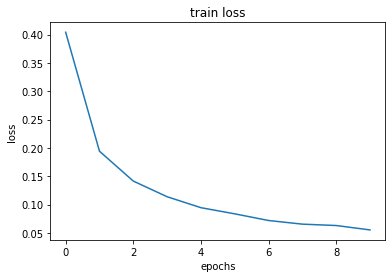

In [ ]:
plt.title('train loss')
plt.plot(history['train_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

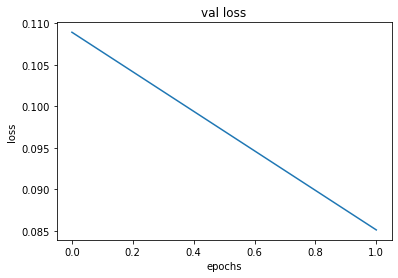

In [ ]:
plt.title('val loss')
plt.plot(history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

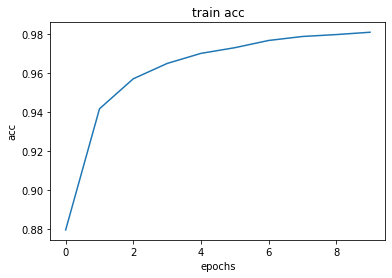

In [ ]:
plt.title('train acc')
plt.plot(history['train_acc'])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

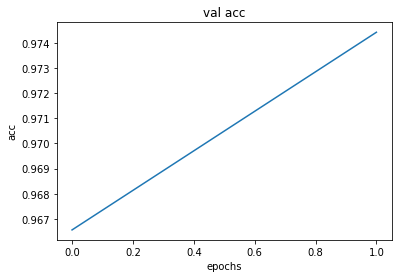

In [ ]:
plt.title('val acc')
plt.plot(history['val_acc'])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

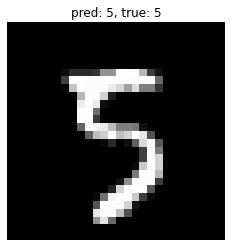

In [ ]:
idx=5
images, labels = next(iter(valloader))
img, label = images[idx].to(device), labels[idx]
with torch.no_grad():
    y_hat = model(img)
pred_idx = y_hat.max(1)[1].item()
plt.imshow(images[idx][0], cmap='gray')
plt.axis(False)
plt.title(f'pred: {pred_idx}, true: {label}')
plt.show()